In [35]:
import numpy as np
import seaborn as sns

In [10]:
import pandas as pd

csv_encoding = "latin-1"  # Replace with the actual encoding of your file

df = pd.read_csv("../artifacts/data/new_laptop_price.csv", encoding=csv_encoding)

In [11]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


## Transform the price column to dollars

In [15]:
exchange_rate = 0.012  # 19/05/2023

# Convert the 'price_inr' column to USD
df['Price'] = df['Price'] * exchange_rate

In [16]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,415.788,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,467.988,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,479.988,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,839.880,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,323.880,3 stars,0,0


## Data Shape

In [17]:
df.shape

(823, 19)

## Data Information

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              823 non-null    object 
 1   processor_brand    823 non-null    object 
 2   processor_name     823 non-null    object 
 3   processor_gnrtn    823 non-null    object 
 4   ram_gb             823 non-null    object 
 5   ram_type           823 non-null    object 
 6   ssd                823 non-null    object 
 7   hdd                823 non-null    object 
 8   os                 823 non-null    object 
 9   os_bit             823 non-null    object 
 10  graphic_card_gb    823 non-null    object 
 11  weight             823 non-null    object 
 12  warranty           823 non-null    object 
 13  Touchscreen        823 non-null    object 
 14  msoffice           823 non-null    object 
 15  Price              823 non-null    float64
 16  rating             823 non

## Data description

In [19]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,920.942129,315.301337,37.609964
std,541.221486,1047.382654,121.728017
min,203.880000,0.000000,0.000000
25%,553.140000,0.000000,0.000000
50%,779.880000,17.000000,2.000000
75%,1075.632000,139.500000,18.000000
max,5303.880000,15279.000000,1947.000000


## util functions

In [30]:
import matplotlib.pyplot as plt

def draw_hist_dist(column_name):
    counts = df[column_name].value_counts()

    plt.bar(counts.index, counts.values)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'{column_name} Distribution')
    for i, count in enumerate(counts.values):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.show()

## Columns analysis

#### Brand column
* There are 9 brands : ['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE']
* There are more ASUS laptop in this dataset

In [21]:
df['brand'].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

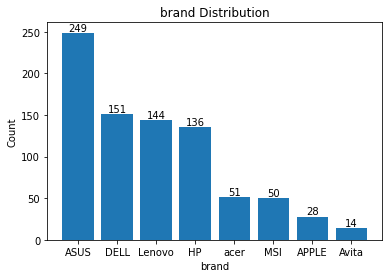

In [31]:
draw_hist_dist("brand")

#### Processor_brand column
* There are 3 processor brand : Intel, AMD, M1
* There are a lot of intel laptops in this dataset

In [26]:
df['processor_brand'].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

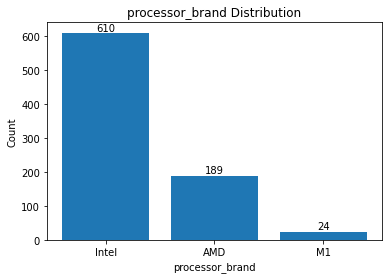

In [32]:
draw_hist_dist("processor_brand")

### Loop over all columns that are not numerical

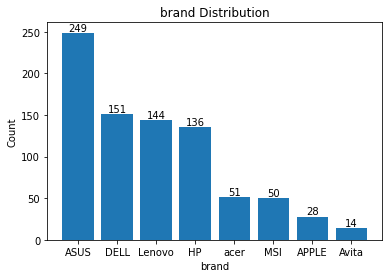

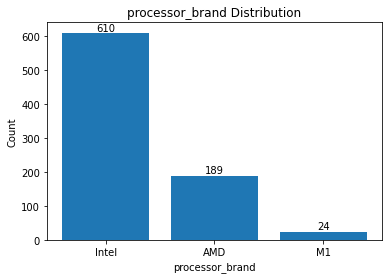

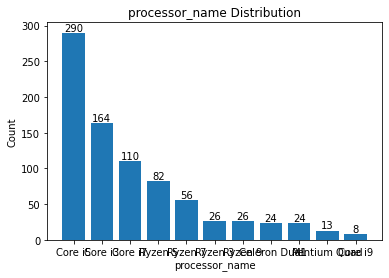

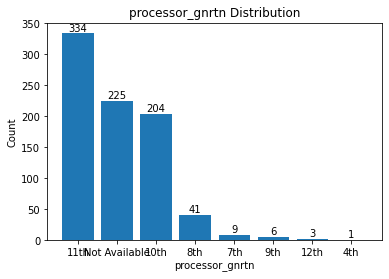

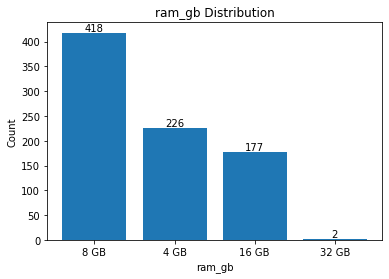

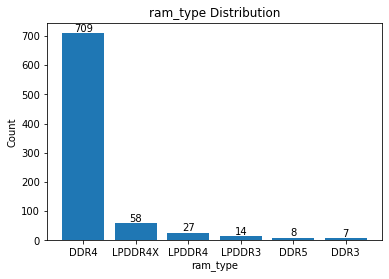

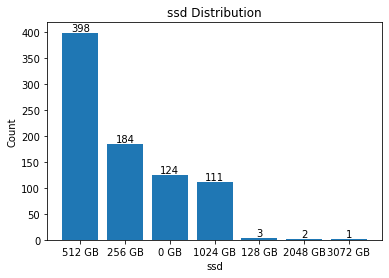

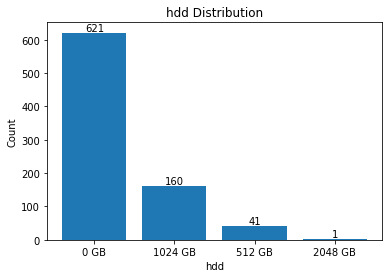

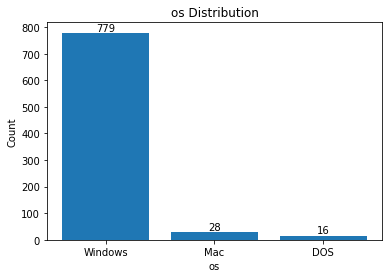

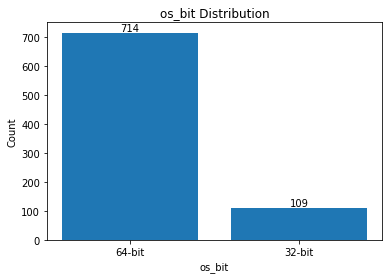

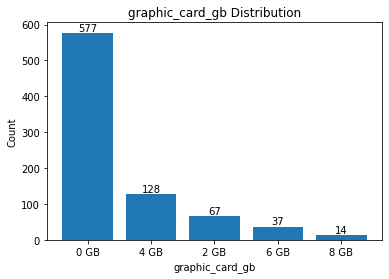

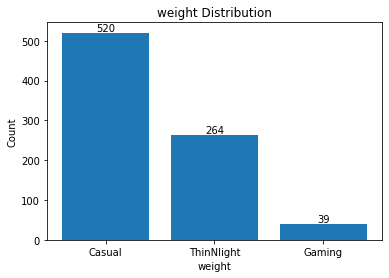

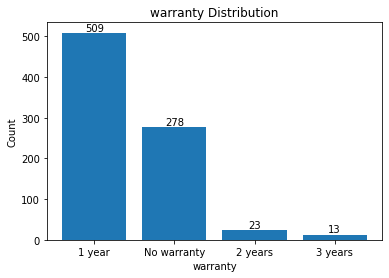

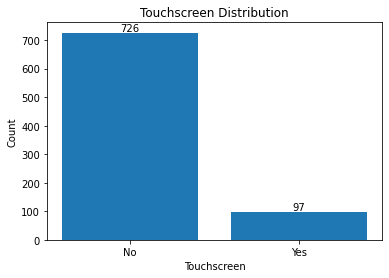

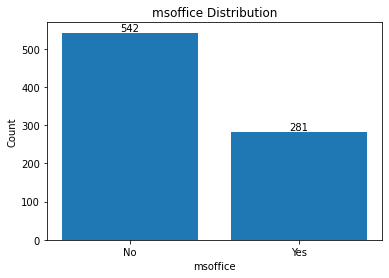

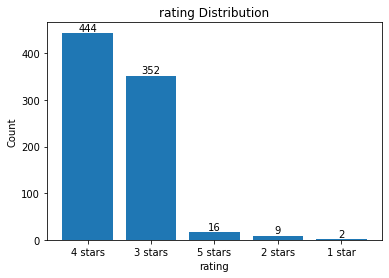

In [44]:
for c in df.columns:
    if df[c].dtype == "O":
        draw_hist_dist(c)

#### Processor brand with their names

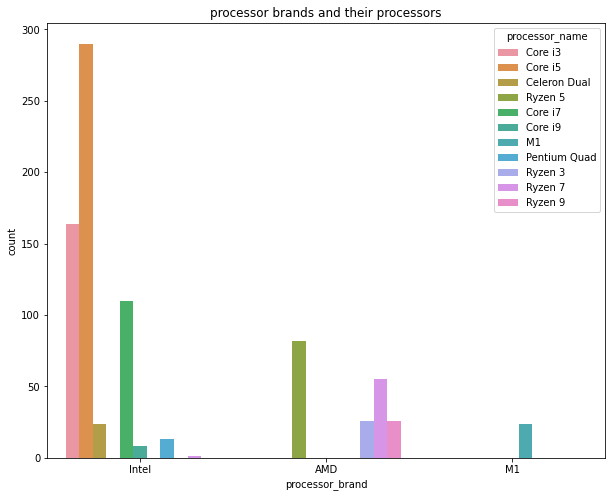

In [48]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='processor_brand', hue='processor_name')
plt.title('processor brands and their processors')
plt.show()

## Laptop price with respect to some columns

In [58]:
df.groupby('brand')['Price'].mean().reset_index().Price.values

array([1820.49428571,  947.25122892,  781.88914286,  731.21594702,
        883.68326471,  875.0425    , 1184.55624   ,  869.04047059])

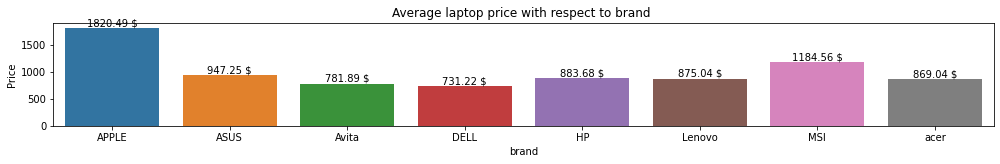

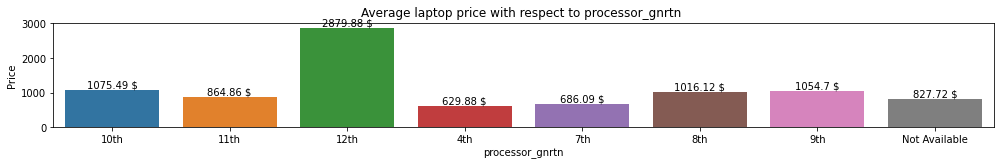

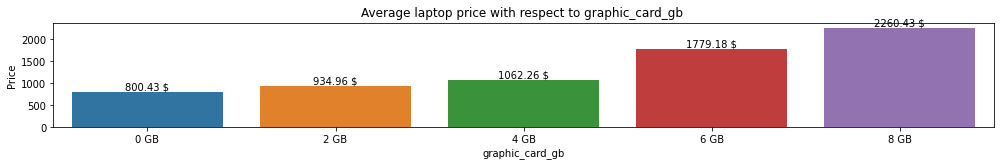

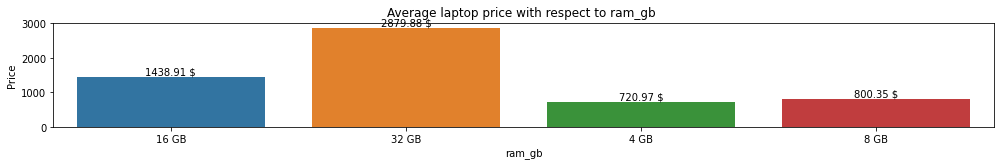

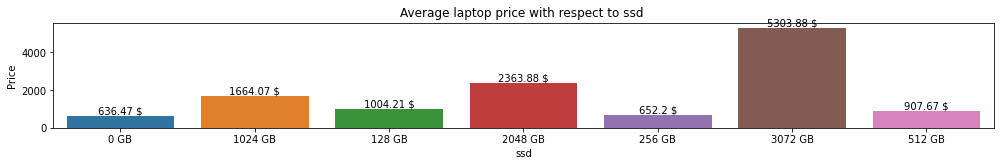

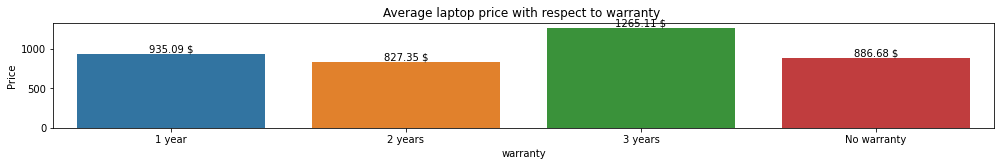

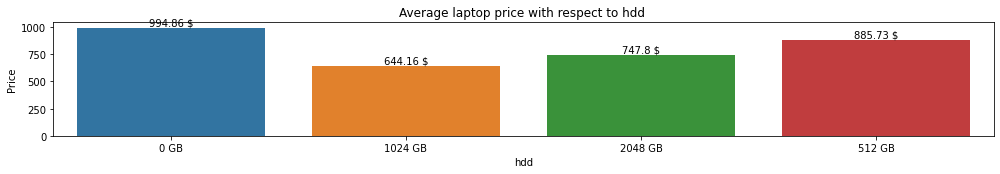

In [61]:
cols = ['brand', 'processor_gnrtn', 'graphic_card_gb', 'ram_gb', 'ssd', 'warranty', 'hdd']
for count, col in enumerate(cols):
    plt.figure(figsize=(14, 14))
    plt.subplot(len(cols), 1, count + 1)
    tmp_df = df.groupby(col)['Price'].mean().reset_index()
    sns.barplot(data=tmp_df, x=col, y='Price')
    plt.title(f'Average laptop price with respect to {col} ')
    plt.tight_layout()
    for i, price in enumerate(tmp_df['Price'].values):
        plt.text(i, price, str(round(price, 2))+ ' $', ha='center', va='bottom')
plt.show()